# Pyeatspi Package Demonstration

## Set Up

In [3]:
import pyeatspi

# The following dependacies are required
import math
import decimal
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Circle Ratio (Naive Method)

If you searched online how to simulate $\pi$ using monte carlo, you will probably stumble across this method first.

Suppose you have circle bounded by a square. The area of the cirle is then $\pi r^2$ and the area of the square is $4r^2$. The ratio between the two areas is $\pi / 4$! For a large number of random samples from the square,

\begin{align*}
\frac{\pi}{4} &= \frac{\text{points inside the circle}}{\text{points inside the square}} \\
\pi &= 4 * \frac{\text{points inside the circle}}{\text{points inside the square}}
\end{align*}

To find the number of points inside the circle, we simply need to check whether $x^2 + y^2 \leq 1$ for $(x, y)$ pairs generated.

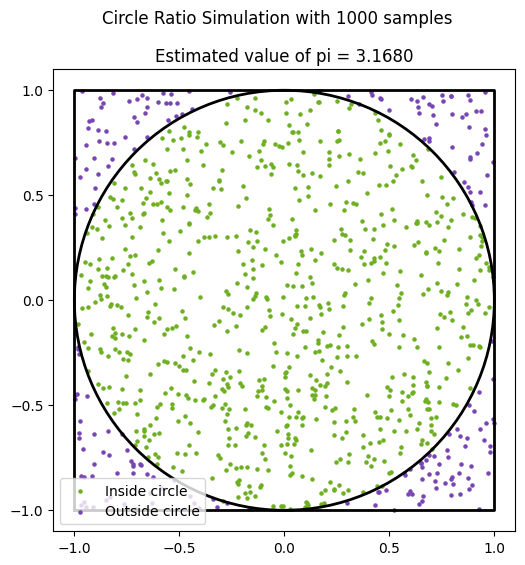

In [4]:
pie = pyeatspi.estimate(sample_size=1000, method="circle-ratio", viz=True)

Switching to `viz = False` or leaving the argument empty allows us to get the value of $\pi$ as a float.

In [5]:
pie = pyeatspi.estimate(sample_size=1000, method="circle-ratio", viz=False)
print(pie)

3.092


## Drunkard (Markov-Chain Method)

In the `circle-ratio` method, we sampled i.i.d. samples from two uniform(-1, 1) distributions. What if we instead sampled from a Markov-chain that has a stationary distribution between (-1, 1)? As the chain explores and bumps along the side of the walls (like a drunkard), we collect these samples to estimate $\pi$! 

Furthermore, you should experiment with the `step_size` parameter to explore its relation to sample size.

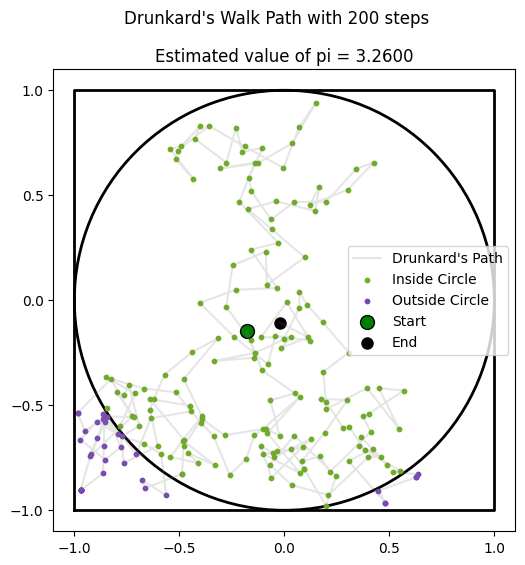

In [7]:
pie = pyeatspi.estimate(sample_size=200, method="drunkard", viz=True)

# You can also specify the step size, the default is 0.2
# pyeatspi.estimate(sample_size=200, method="drunkard", step_size=0.1, viz=True)

## Monte-Carlo Integration

We know that 

$$\int_{1}^{0} \sqrt{(1 - x^2)} = \frac{\pi}{4}$$

The LHS can be estimated using monte-carlo integration.


\begin{align*}
\frac{\pi}{4} &\approx \frac{1}{N} \sum_{i=1}^{N} \sqrt{1 - x_i^2}, \quad x_i \sim \text{Uniform}(0,1) \\

\pi &\approx 4 \left( \frac{1}{N} \sum_{i=1}^{N} \sqrt{1 - x_i^2} \right)
\end{align*}

In [9]:
pie = pyeatspi.estimate(sample_size=100000, method="mc-integral")
print(pie)

3.1433883056259835


## Buffon's Needle Problem

In the words of Georges-Louis Leclerc, Comte de Buffon: 
> Suppose we have a floor made of parallel strips of wood, each the same width, and we drop a needle onto the floor. What is the probability that the needle will lie across a line between two strips?

Given needle length $l$ and width of strips of wood $t$, given $l$ < $t$, it turns out the probability $p$ that a needle crosses the strip is 

$$
p = \frac{2}{\pi} \times \frac{l}{t}
$$

This can again be used to design a monte-carlo method to estimate $\pi$ by estimating $p$ by conducting the experiment described by Buffon above! We randomly drop needles by simulating a random position $(x,y)$ and random angle $\theta$.

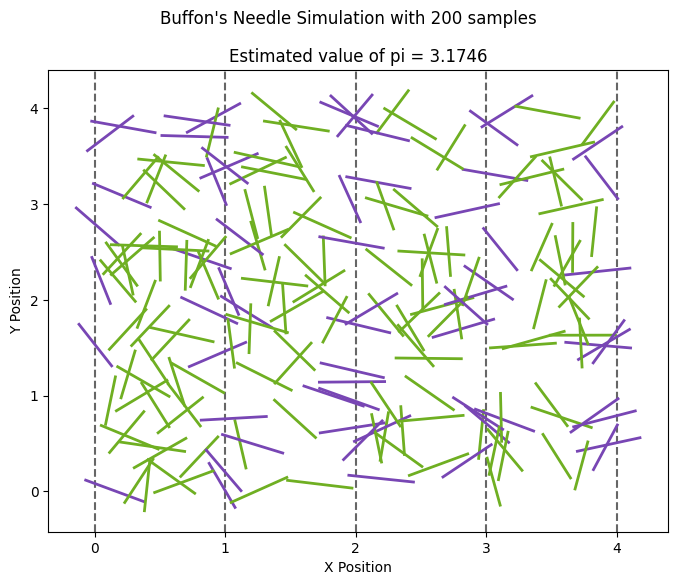

In [10]:
pie = pyeatspi.estimate(sample_size=200, method="buffon", viz=True)

## Laplace's Extension to Buffon's Needle Problem

Laplace proposed a similar problem following up from Buffon's intial findings. Instead now we generate a **grid** of equally spaced parallel lines, $t$ units apart. 

In [11]:
pie = pyeatspi.estimate(sample_size=1000, method="laplace", viz=False)
print(pie)

3.1702898550724634


The natural next question, proposed by E.F. Schuster nearly 200 years later, is whether Laplace's method is a better estimate of $\pi$ better than Buffon's. It can be proved that Laplace's method does reduce the variance of the estimate. This type of variance reduction is known as **antithetic variates** method.

Don't trust me? Run `.compare_std`!

In [13]:
comparisions = pyeatspi.compare_std(sample_size = 1000, 
                     simulation_size = 1000, 
                     methods = ["buffon", "laplace"])

Running simulations...


100%|██████████| 2000/2000 [00:00<00:00, 2561.26it/s]


Comparison of Standard Deviation for Pi Estimation Methods:
buffon           0.145567
laplace          0.090595


# Newton's Method

Newton's Method is an iterative root-finding algorithm. $\text{sin}(x)$ of course has a root of 0 at multiples of $\pi$. Given an inital guess for $\pi$, say $x_n$, the next approximation to $\text{sin}(x) = 0$ is 

$$
x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}
$$

There are good inital guesses and bad inital guesses, you can play with them below using the `inital_guess` parameter. The "goodness" of the guess depends on whether the quadratic approximation Newton's Method uses is sufficiently accurate to model the function. If the approximation is good, very few iterations will be needed. The `sample_size` parameter dictates the maximum number of iterations. However, when the difference between guesses is less than the `tolerance`, the algorithm stops.

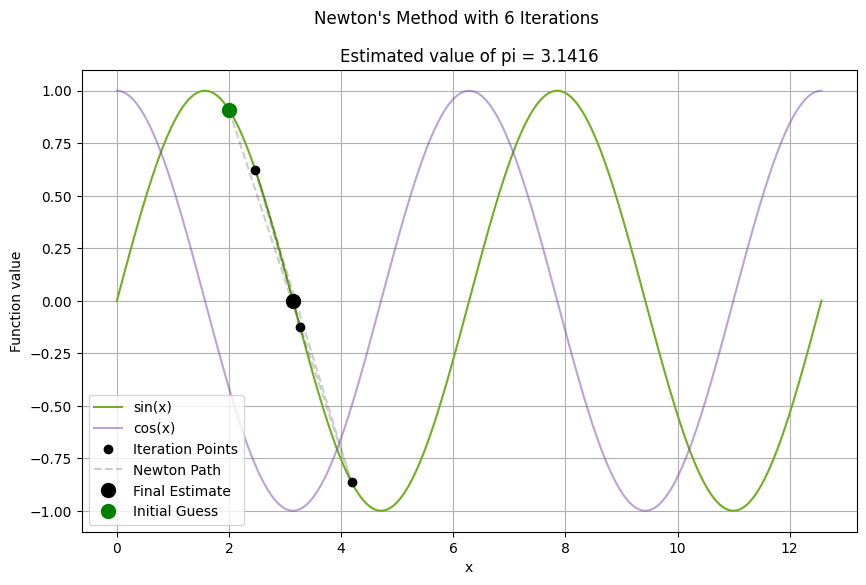

In [14]:
pie = pyeatspi.estimate(sample_size=1000, method="Newtons", viz=True)

# You can also specify the intial guess (default is 2) and tolerance to stop (default is 1e-6).
# pyeatspi.estimate(sample_size=1000, method="Newtons", viz=True, inital_guess = ((5*math.pi)/2)-0.1, tolerance = 0.0001)

## Chudnovsky (Exact Method)

The Chudnovsky algorithm is a fast, **exact method** used to calculate the digits of $\pi$ to 202 trillion digits in 2024. While the technical details are extremely interesting and there are many "tricks" to further optimize the algorithm, this package implements the orginal algorithm. 

The formula is:

$$
\frac{1}{\pi} = 12 \sum^\infty_{k=0} \frac{(-1)^k (6k)! (13591409 + 545140134k)}{(3k)!(k!)^3 640320^{3k + 3/2}}
$$

In short, it is based off Heegner number, the j-invariant function, and on the generalized hypergeometric series. The detailed proof can be found [here](https://doi.org/10.4169%2F193009709X458555).

Note: the `sample_size` argument in the chudnovsky method is used instead to specify the number of decimal places desired. Calculating past 100,000 decimal places is NOT recommended!!

In [15]:
pie = pyeatspi.estimate(sample_size=1000, method="chudnovsky")
print(pie)

Calculating pi using Chudnovsky method to 1000 decimal places.
3.14159265358973420766845359157829834076223326091570659089414549873766620940165910806611734746968975779816037965556627803580134599593513286173176615982806223108044197378531253056515211574708593383177441545960227458762771284659141813373992285953578411298808837824212679468963352921667694733661968071515934930958426926509080187699606147066217003750206017344284513142480930327868775560407147230694298134457874666577264449855962909198605596363589840089471381011611119568568487059625701387272325228479818691718486735309670822230361529297173281542326149548020604640535398750760139733285849996526642119020066783578725502635682724402886356888437352889825068423383099057400137583277017849088913229585279736010131695950194588893494423641253939414653073848363666504226415438777337601770710914242874437971783262033721044052592738923786964883764463574460244839242316267458666952279157823643188349561706488522607702179621859051987411401889519686123157